In [31]:
import pandas as pd

In [32]:
import numpy as np

In [33]:
import matplotlib.pyplot as plt

In [34]:
import seaborn as sns

In [35]:
import plotly.express as px

In [36]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
from sklearn.linear_model import PassiveAggressiveRegressor

In [39]:
import os

In [40]:
os.getcwd()

'C:\\Users\\NELSON ESTHER\\AppData\\Local\\Programs\\Microsoft VS Code'

In [41]:
data = pd.read_csv("C:\\Users\\NELSON ESTHER\\Desktop\\project ws\\Instagram\\Instagram data.csv", encoding = 'latin1')

In [42]:
print(data.head())

   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

In [43]:
data.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [44]:
data = data.dropna()

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


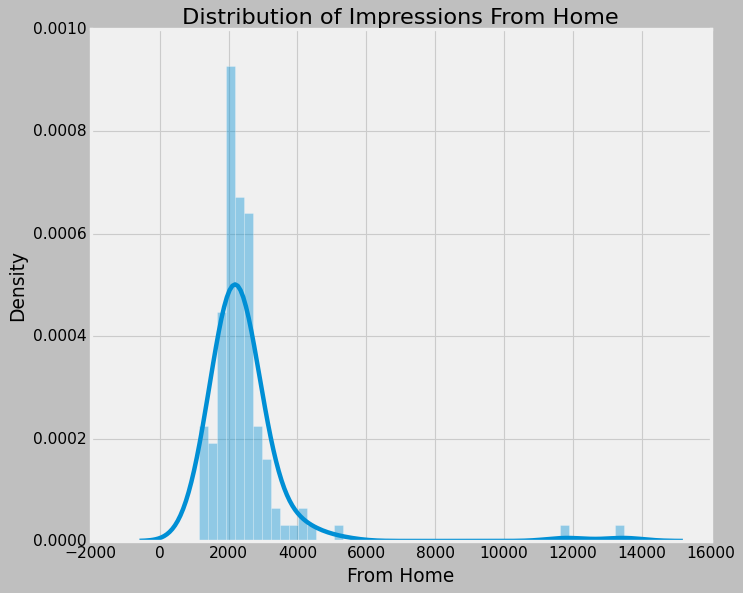

In [46]:
#distribution of impressions from home
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Home")
sns.histplot(data['From Home'], kde=True, stat='density', kde_kws=dict(cut=3), alpha=.4, edgecolor=(1,1,1,.4))
plt.show()

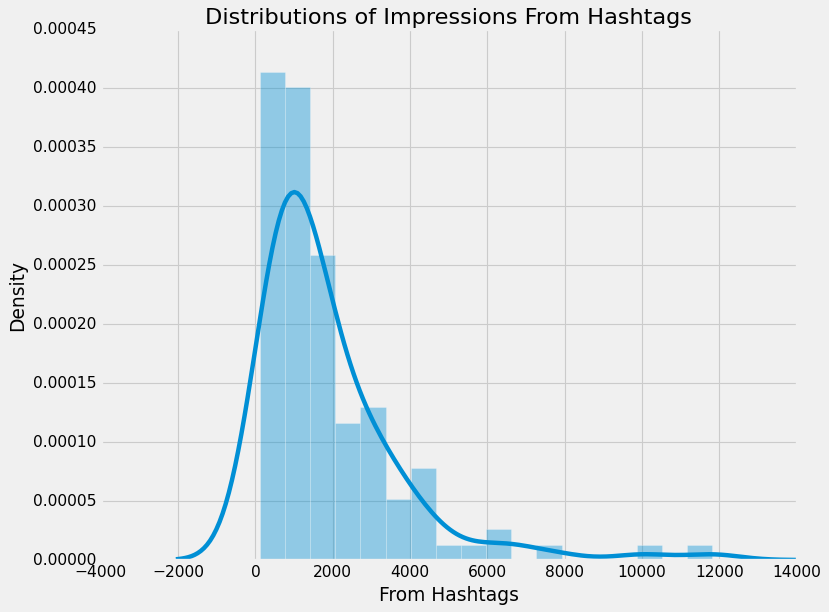

In [47]:
# distribution of impressions from hashtags
plt.figure(figsize=(10,8))
plt.style.use('fivethirtyeight')
plt.title('Distributions of Impressions From Hashtags')
sns.histplot(data['From Hashtags'], kde=True, stat='density', kde_kws=dict(cut=3), alpha=.4, edgecolor=(1,1,1,.4) )
plt.show()

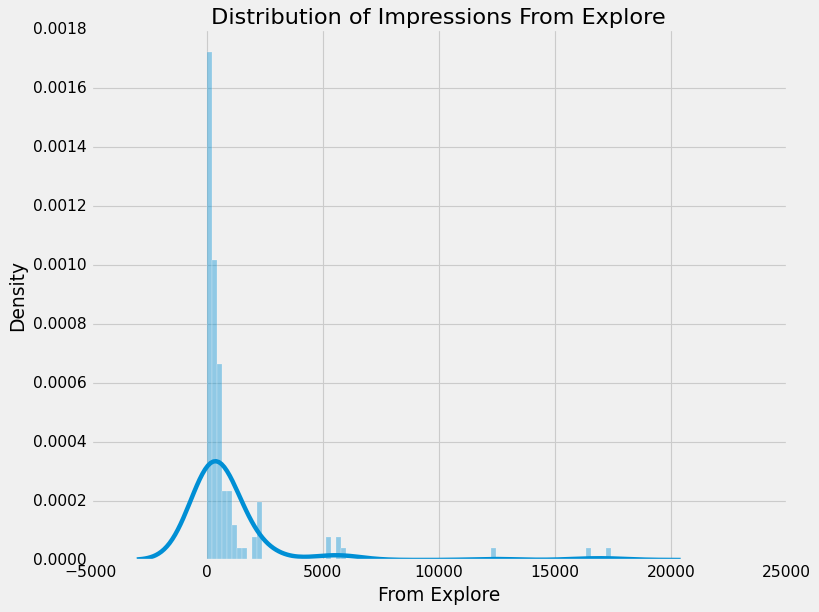

In [48]:
# distribution impressions from explore
plt.figure(figsize=(10,8))
plt.style.use('fivethirtyeight')
plt.title('Distribution of Impressions From Explore')
sns.histplot(data['From Explore'], kde=True, stat='density', kde_kws=dict(cut=3), alpha=.4, edgecolor=(1,1,1,.4))
plt.show()

In [49]:
# to look at percentage of impressions
home = data["From Home"].sum()
hashtags = data["From Hashtags"].sum()
explore = data["From Explore"].sum()
other = data["From Other"].sum()

labels = ['From Home', 'From Hashtags', 'From Explore', 'From Other']
values = [home, hashtags, explore, other]

fig = px.pie(data, values=values, names=labels,
            title = 'Impressions on Instagram Posts From Various Sources', hole=0.5)
fig.show()

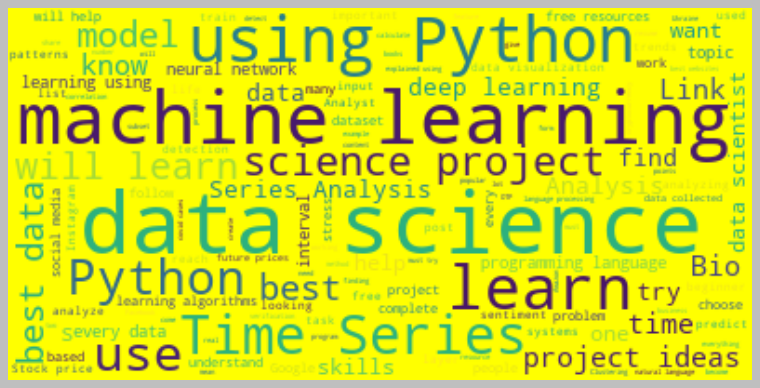

In [50]:
text = " ".join(i for i in data.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="yellow").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


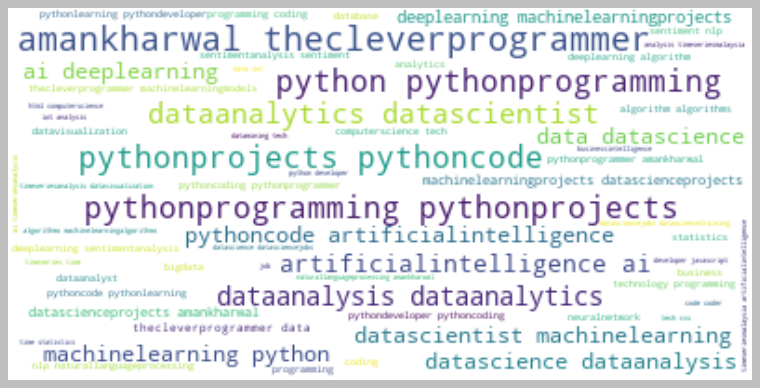

In [51]:
text = " ".join(i for i in data.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [52]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Likes", size="Likes", trendline="ols", 
                    title = "Relationship Between Likes and Impressions")
figure.show()

In [53]:
figure = px.scatter(data_frame = data, x="Follows",
                    y="Likes", size="Likes", trendline="ols", 
                    title = "Relationship Between Likes and Follows")
figure.show()

In [54]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Comments", size="Comments", trendline="ols", 
                    title = "Relationship Between Comments and Impressions")
figure.show()

In [55]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Shares", size="Shares", trendline="ols", 
                    title = "Relationship Between Shares and Impressions")
figure.show()

In [56]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Saves", size="Saves", trendline="ols", 
                    title = "Relationship Between Saves and Impressions")
figure.show()

In [57]:
correlation = data.corr(numeric_only=True)
print(correlation['Impressions'].sort_values(ascending=False))

Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64


In [58]:
conver_rate = (data['Follows'].sum()/data['Profile Visits'].sum())*100
print(conver_rate)

41.00265604249668


In [59]:
figure = px.scatter(data_frame=data, x='Profile Visits', y='Follows',
                   size='Follows', trendline='ols',
                   title='Relationship between Profile Visits and Follows')
figure.show()

In [60]:
figure = px.scatter(data_frame = data, x="Comments",
                    y="Likes", size="Likes", trendline="ols", 
                    title = "Relationship Between Likes and Comments")
figure.show()
